In [1]:
import numpy as np
import pandas as pd

In [2]:
import sklearn.datasets

In [3]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [4]:
import matplotlib.pyplot as plt

In [5]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [6]:
class point:
    def __init__(self,x):
        self.x = x
        self.ClId = "Unclassified"
        self.attribute = "Noise"
        
    def __add__(self,p2):
        return self.x+p2.x
    
    def __sub__(self,p2):
        return self.x - p2.x
    
    def __pow__(self,x):
        return self.x**2

In [7]:
def regionQuery(Point,Eps,SetOfPoints):
    seeds_ = []
    for p in SetOfPoints:
        if np.sqrt(np.sum((Point-p)**2)) < Eps:
            seeds_.append(p)
    return seeds_[:]

In [8]:
def ExpandCluster(SetOfPoints,Point,ClId,Eps,MinPts):
    seeds = regionQuery(Point,Eps,SetOfPoints)
    if len(seeds) < MinPts: # not core point
        Point.ClId = "Noise"
        return False
    else: # all points in seeds are density-reachable from Point
        # change clids for all points
        for p in seeds:
            p.ClId = ClId

        Point.attribute="Core"
        
        seeds.remove(Point)
        while len(seeds):
            currentP = seeds[0]
            result = regionQuery(currentP,Eps,SetOfPoints)
            
            if len(result) >= MinPts:
                currentP.attribute="Core"
                for p in result:
                    if p.ClId in ["Noise","Unclassified"]:
                        if p.ClId == "Unclassified":
                            seeds.append(p)
                        p.ClId = ClId
            else:
                p.attribute = "Border"
            seeds.remove(currentP)
        return True

In [9]:
def DBSCAN(SetOfPoints,Eps,MinPts):
    ClusterId = 1
    for p in SetOfPoints:
        if p.ClId == "Unclassified":
            if ExpandCluster(SetOfPoints,p,ClusterId,Eps,MinPts):
                ClusterId += 1
    return ClusterId

In [10]:
points = []
for x in X:
    points.append(point(x))

In [11]:
ClusterId = DBSCAN(points,.3,10)

In [12]:
labels = np.array([p.ClId for p in points])
if "Noise" in labels:
    labels[labels=='Noise']=0
labels = labels.astype(np.int)

In [13]:
size = np.array([p.attribute for p in points])
if (size=="Core").any():
    size[size=="Core"]=750
if (size=="Border").any():
    size[size=="Border"]=200
if (size=="Noise").any():
    size[size=="Noise"]=200
size = size.astype(np.int)

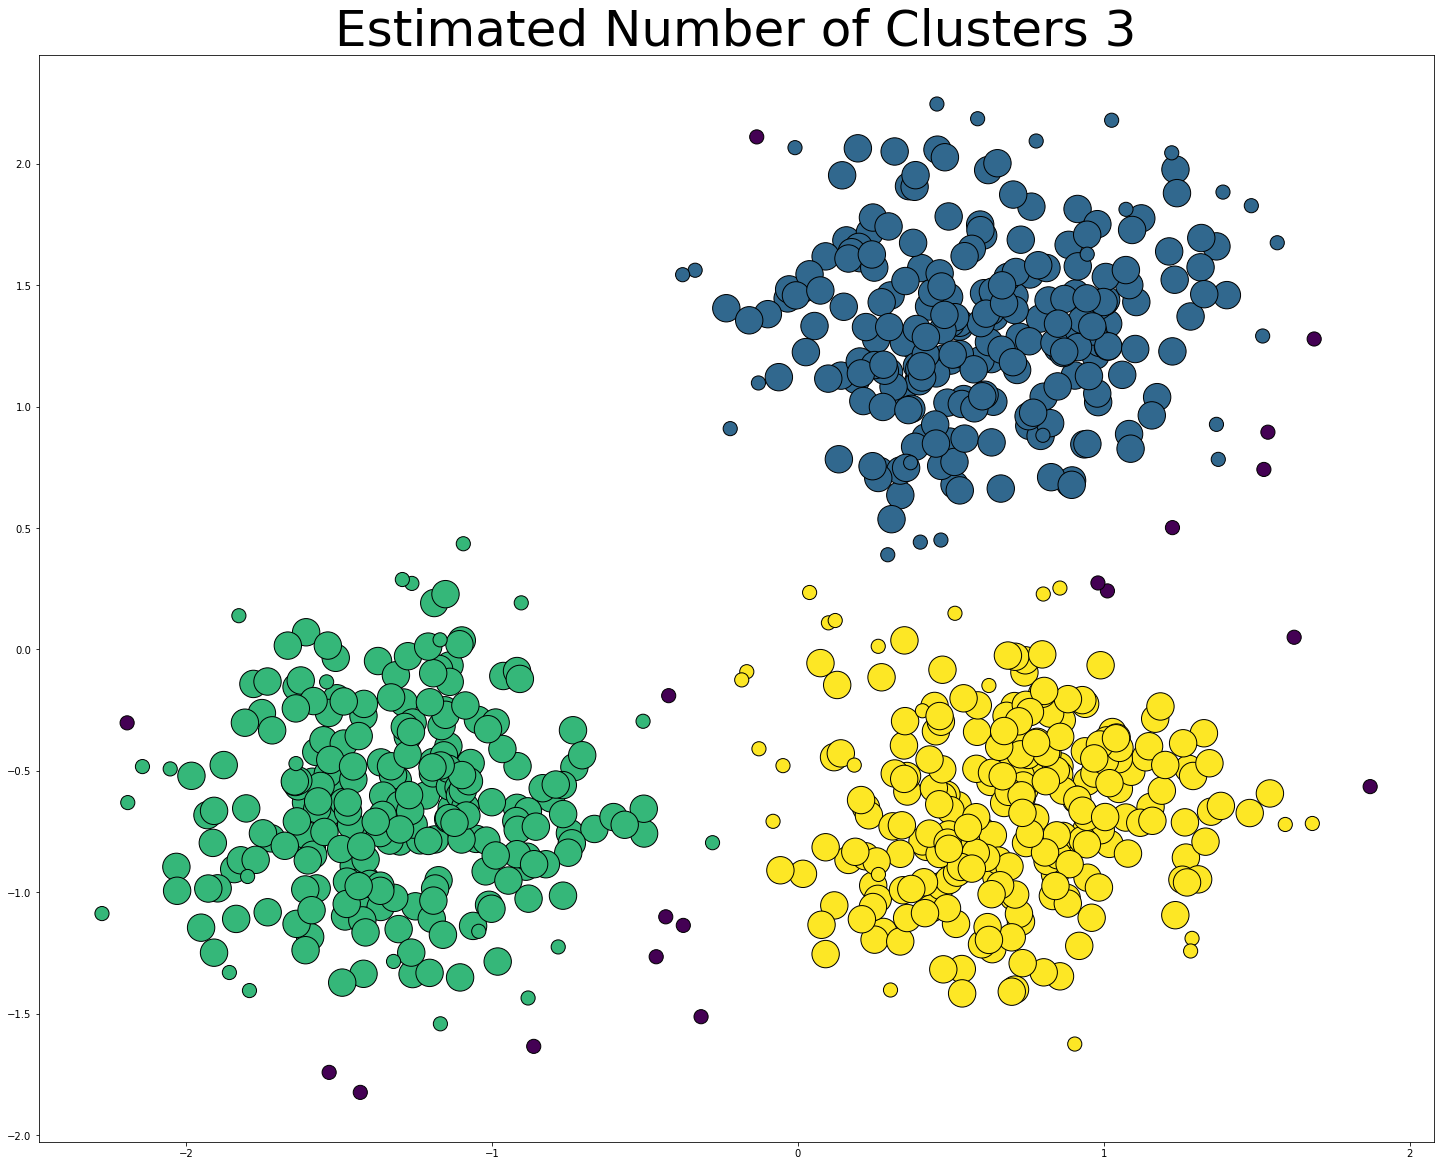

In [14]:
plt.figure(figsize=(25,20))
plt.scatter(X[:,0],X[:,1],s=size,c=labels,edgecolors='k')
plt.title("Estimated Number of Clusters {}".format(ClusterId-1),fontsize=50)
plt.show()

# moon data

In [15]:
n_samples = 1500
noisy_moons = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)

points = []
for x in noisy_moons[0]:
    points.append(point(x))

In [16]:
ClusterId = DBSCAN(points,.2,5)

In [17]:
labels = np.array([p.ClId for p in points])
if "Noise" in labels:
    labels[labels=='Noise']=0
labels = labels.astype(np.int)

C:\Users\lpott\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [18]:
size = np.array([p.attribute for p in points])

if (size=="Core").any():
    size[size=="Core"]=750
if (size=="Border").any():
    size[size=="Border"]=200
if (size=="Noise").any():
    size[size=="Noise"]=200
    
size = size.astype(np.int)

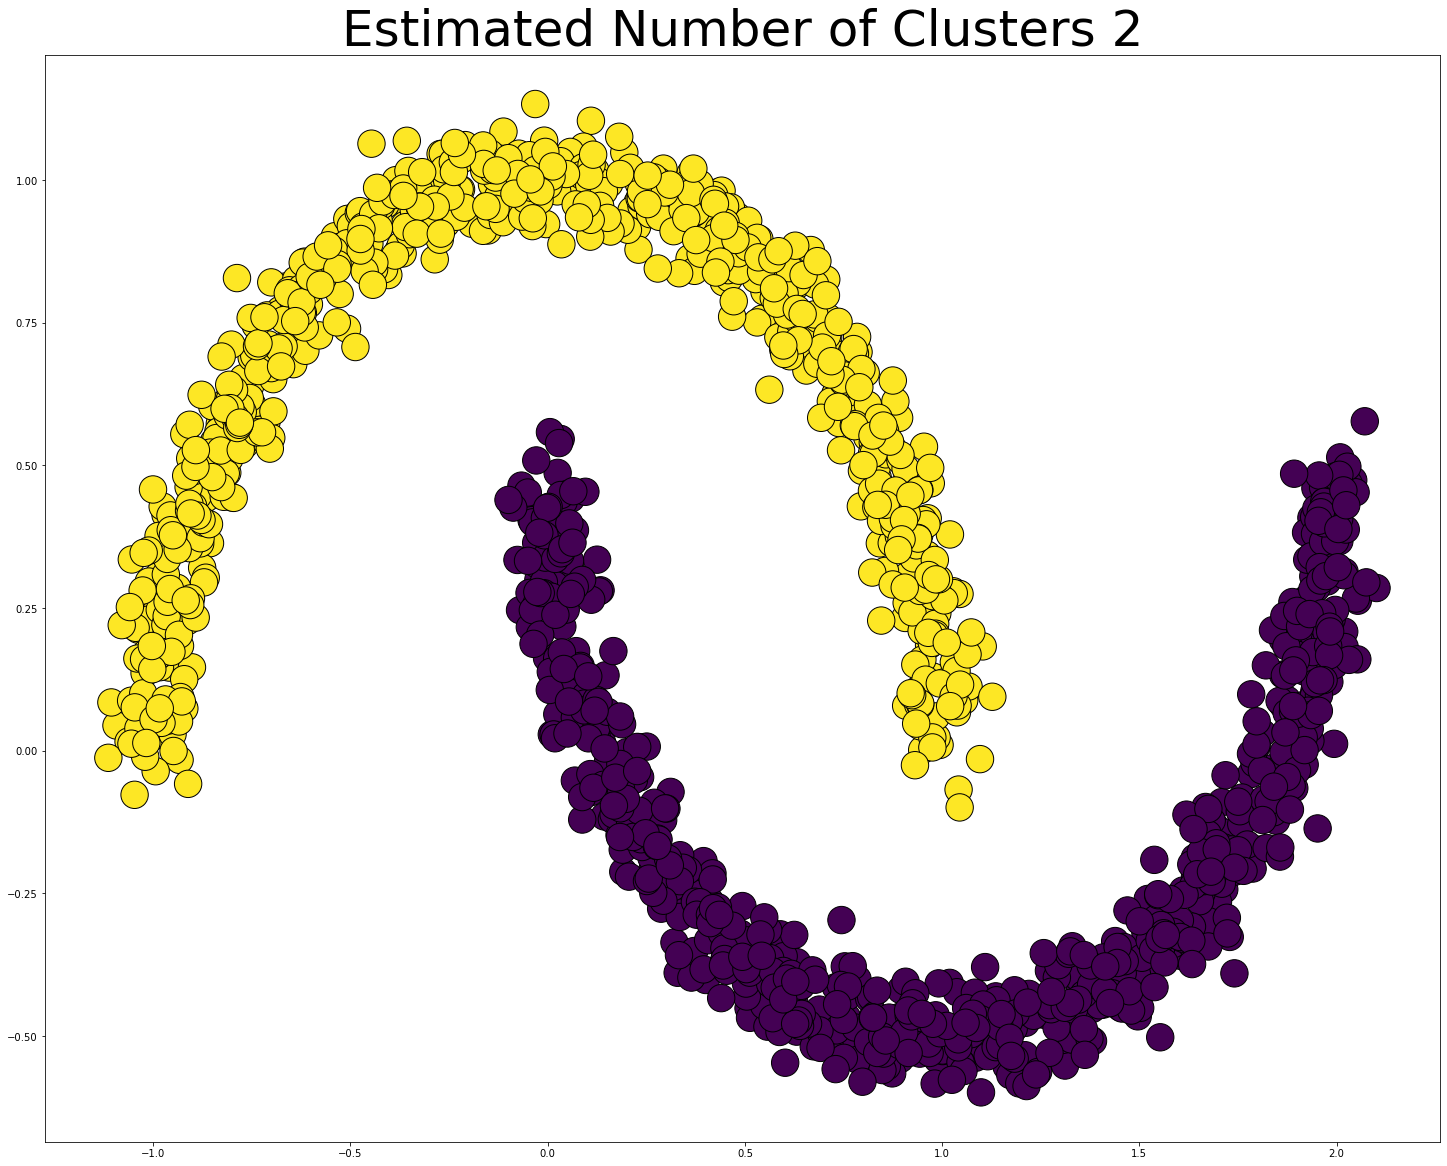

In [19]:
plt.figure(figsize=(25,20))
plt.scatter(noisy_moons[0][:,0],noisy_moons[0][:,1],s=size,c=labels,edgecolors='k')
plt.title("Estimated Number of Clusters {}".format(ClusterId-1),fontsize=50)
plt.show()